In [7]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import eigh
from scipy import spatial
from sklearn import datasets


# Session_1  PCA,

### $\star$ The MNIST data set

 Assume we have a collection of images of handwritten digits. Let $\textbf{x}_n \in \mathbb{R}^D$ be a $D$-dimensional vector representation of the $n$'th image and let $y_n \in \left\lbrace 0, 1, \dots, 9 \right\rbrace$ be the corresponding label indicating the number that  the image contains . Each of our images consists $28 \times 28$ binary pixels, i.e. a total of $28^2 = 784$ pixels. Thus, each image is represented using a $D = 784$ dimensional vector.

Assume we have a dataset of $N$ such image-label pairs, i.e. $\mathcal{D} = \left\lbrace (\textbf{x}_n, y_n) \right\rbrace_{n=1}^N$.

Run the following code to load the MNIST dataset of digit images and plot all the images.

In [10]:
# load data
data = np.load('./mnist_bin1.npz')


# get vector representation of binary digits
X   = data['X']

# get binary labels
y = data['y']

print('The shape of X is (%d, %d)' % X.shape)
print('The shape of y is (%d)\n' % y.shape)

# Dimensions
N, D = X.shape

print('Number of images: %d' % N)
print('Number of pixels: %d' % D)

The shape of X is (70000, 784)
The shape of y is (70000)

Number of images: 70000
Number of pixels: 784


Plot for some images

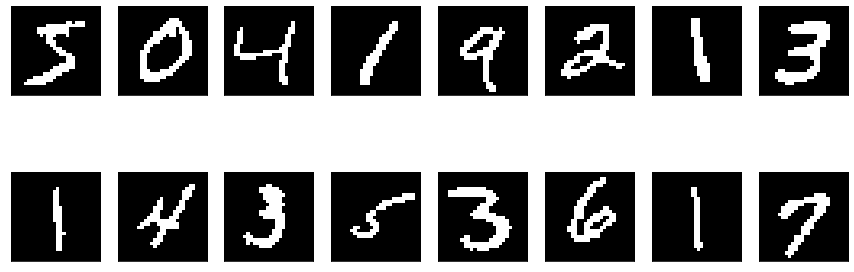

In [13]:
fig = plt.figure(figsize=(15,30))
for i in range(16):    
    ax = fig.add_subplot(10,8,i+1,xticks = [], yticks = [])
    image_i = X[i,:];
    ax.imshow(image_i.reshape(28,28), cmap=plt.cm.gray)

### $\star$ Normalizing data
The purpose of principal component analysis (PCA) is to project the training data onto directions which maximize the variance. Before applying PCA it is custom to normalize the data to avoid that the scales of single features dominate the first principle components.

For these images, normalization is performed by subtracting the average image $\widehat{\mathbf{x}}$ and dividing with the standard deviation of each pixel, i.e. $\tilde{\mathbf{x}}_i = (\mathbf{x}_i - \widehat{\mathbf{x}})/\sigma_{\mathbf{x}}$. 

- Run and understand the code below. Comment on the plot.




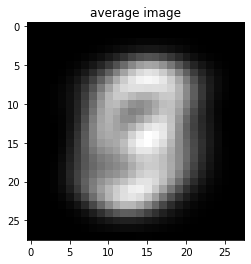

In [14]:
X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0) + 1e-3 # can you explain why we need to add 1e-3 (or some other small number)?
X_bar = (X - X_mean)/X_std

plt.imshow( X_mean.reshape(28,28),cmap = plt.cm.gray)
plt.title('average image')
plt.show()


Plot for the centered data

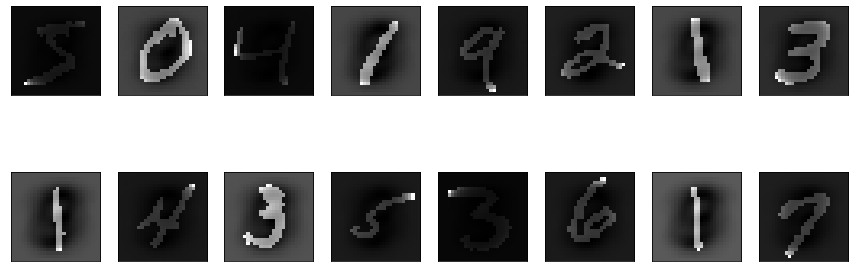

In [15]:
fig = plt.figure(figsize=(15,30))
for i in range(16):    
    ax = fig.add_subplot(10,8,i+1,xticks = [], yticks = [])
    image_i = X_bar[i,:];
    ax.imshow(image_i.reshape(28,28), cmap=plt.cm.gray)

As we have learned earlier that PCA projects turn high-dimensional data into a lower dimensional principal component, we will use functions from "sklearn". Explor the code below and figure what it is doing. We start first with n_components=784

In [16]:
from sklearn.decomposition import PCA
pca             = PCA(n_components=D, svd_solver='full')
pca.fit(X_bar)
sklearn_reconst = pca.inverse_transform(pca.transform(X_bar))
sklearn_reconst = (X_std*sklearn_reconst)+X_mean # rescale back by multiplying with std and add mean

Let's try to plot the first 10 principal components. 

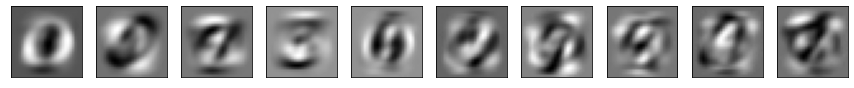

In [17]:
fig = plt.figure(figsize=(15,30))
for i in range(10):    
    plt.subplot(1,10,i+1,xticks = [], yticks = [])
    image_i = pca.components_[i,:];
    plt.imshow(image_i.reshape(28,28), cmap=plt.cm.gray)

Reconstruction:

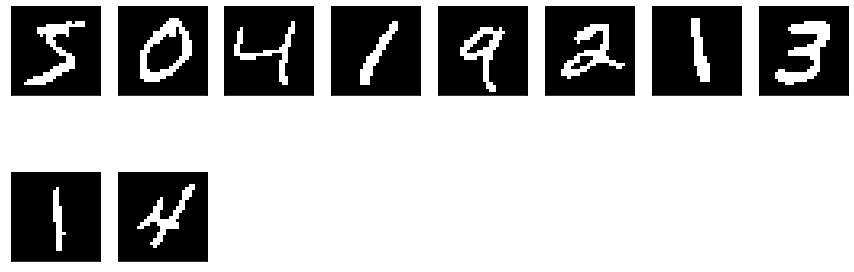

In [18]:
fig = plt.figure(figsize=(15,30))
for i in range(10):    
    ax = fig.add_subplot(10,8,i+1,xticks = [], yticks = [])
    image_i = sklearn_reconst[i,:];
    ax.imshow(image_i.reshape(28,28), cmap=plt.cm.gray)

### $\star$ Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 784 dimensional space to a lower dimensional space, you lose some of the variance (information) when you do this.

By using  "explained_variance_ratio_", you get a vector of the percentage of the variance that each principal component contains. Cumulative sum will give you the explained variance 

\begin{align*}
			E(\lambda_j) = \frac{\lambda_j}{\sum_{i=1}^M \lambda_{i}	}
\end{align*}
where $M=784$ in our case.

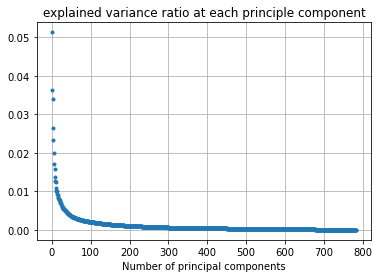

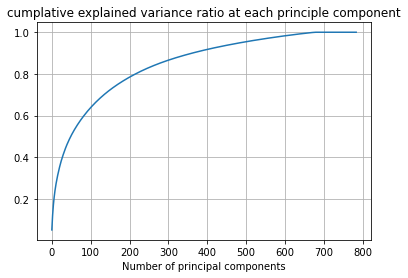

In [9]:
variance = pca.explained_variance_ratio_ 
explained_variance=np.cumsum(pca.explained_variance_ratio_)


plt.plot(variance,".");
plt.title('explained variance ratio at each principle component')
plt.xlabel('Number of principal components')
plt.ylabel('')
# plt.xlim([0,50])
plt.grid(True)
plt.show();


plt.plot(explained_variance);
plt.title('cumplative explained variance ratio at each principle component')
plt.xlabel('Number of principal components')
plt.ylabel('')
plt.grid(True)
plt.show();

Try different number of components such 2,10, 50, 100, plot the aproximated images for each case. 
Chek the previous figure and choose the number of components that gives a good aproximatons. 